# 7. Vizualizacija podataka
### *ggplot2* package
Kvalitetan prikaz podataka može biti od velike koristi prilikom istraživačke analize. Vizualizacija ovdje igra glavnu ulogu.  
U ovoj vježbi koristit ćemo tri paketa:  
- `gapminder` - koji predstavlja skup podataka
- `dplyr` - koji sadrži funkcije za manipuliranje podacima (`filter`, `arrange`, `mutate`, ...)
- `ggplot` - koji nam omogućuje izradu grafova<br><br>

Ukoliko nemamo pakete od ranije moramo ih najprije instalirati:

In [1]:
install.packages('gapminder')
install.packages('dplyr')
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



A, potom ih moramo učitati

In [2]:
library(gapminder)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Sada možemo krenuti sa primjerom.  
**Primjer:**  
Kreirajte varijablu `gapminder_2007` u koju ćete pohraniti sve podatke iz skupa podataka `gapminder` koji se odnose na 2007. godinu.

In [3]:
# Pa zatim kreirati novu varijablu koristeći filter
gapminder_2007 <- gapminder %>%
  filter(year==2007)

## Raspršeni grafikon (scatter plot) `geom_point()`
Sada ćemo grafički prikazati varijablu `gapminder_2007` koristeći `ggplot` funkciju. <br> <br>
**Zadatak:**  
Kreirajte raspršeni grafikon (scatter plot) na način da na x osi prikažete varijablu `pop` a na y osi `gdpPercap`.  
Koristit ćemo funkciju `ggplot` gdje je prvi argument naša varijabla (ili skup podataka), a unutar drugog argumenta (`aes`) sa `x` i `y` ćemo definirati varijable po osima. Argument `geom_point()` nam govori da je riječ o raspršenom (točkastom) grafikonu. Argument `aes` dolazi od riječi _'aesthetic'_ tj. estetika, i pomoću njega ćemo mijenjati izgled grafikona.

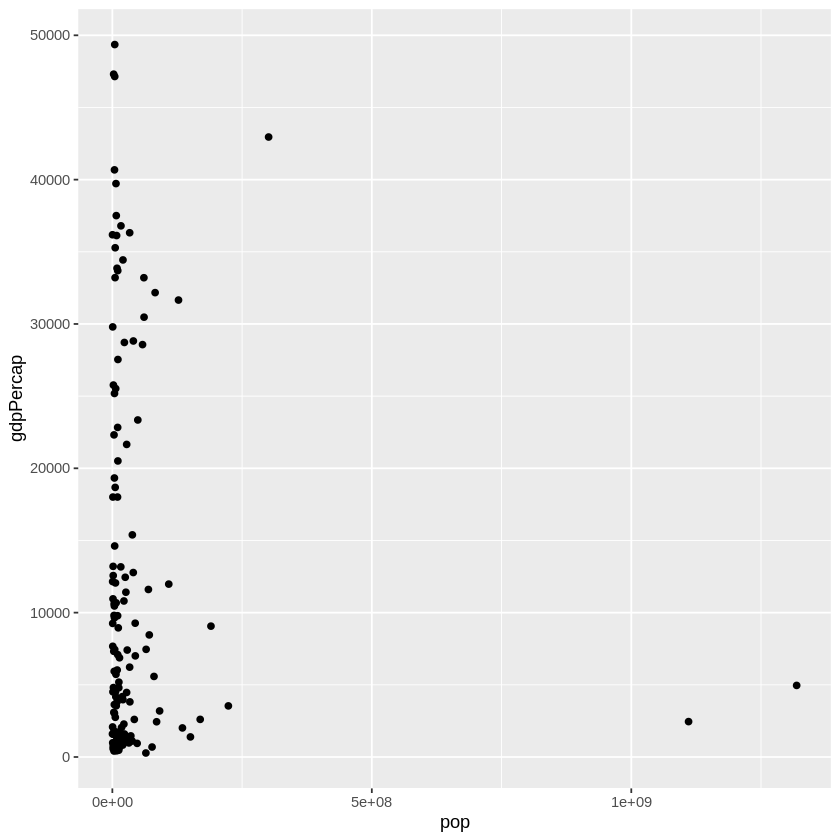

In [4]:
ggplot(gapminder_2007, aes(x = pop, y = gdpPercap)) + geom_point()

## Zadatak
Kreirajte varijablu `gapminder_europe_1952` (sve europske zemlje, 1952. godine) i prikažite ju raspršenim grafikonom na način da na osi stavite GDP po glavi stanovnika i očekivani životni vijek. Da biste vidjeli nazive varijabli unutar dataseta, možete koristiti`str()`. Pazite na velika i mala slova u nazivima varijabli.

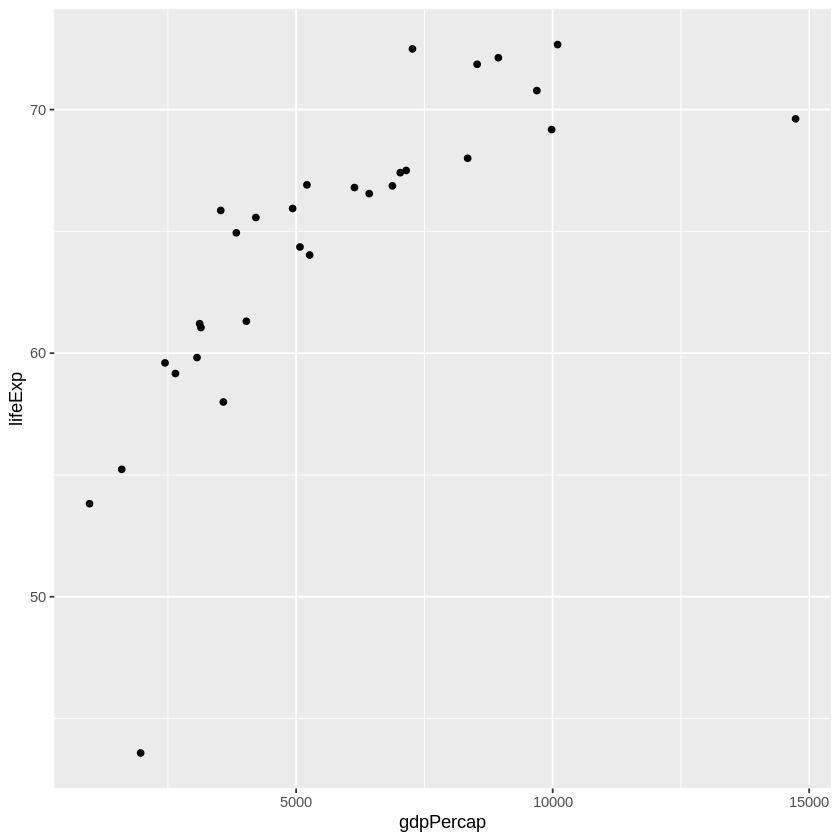

In [5]:
gapminder_europe_1952 <- gapminder %>% filter(continent=='Europe', year==1952)
ggplot(gapminder_europe_1952, aes(x = gdpPercap, y = lifeExp)) + geom_point()

Primjećujete li kako su točkice na grafikonu raspoređene linearno (ako izuzmemo ova dva outliera), to nam govori da postoji veza (korelacija) između prosječnog životnog vijeka i standarda neke države. Što je i logično. Ljudi u bogatijim zemljama imaju kvalitetnije zdravstvo, bolju ishranu, bolje uvjete života, ...

## Osi na logaritamskoj skali
Ako pogledamo prvi primjer sa prikazom broja stanovnika 2007. godine primjetit ćemo da su svi podaci zgusnuti oko y osi.  
To je stoga što postoje velike razlike između mnogoljudnih država i malih država. Za primjer uzmite Hrvatsku i Kinu.  
U takvim slučajevima ćemo koristiti logaritamsku skalu na osi x što grafikon čini čitljivijim.  
Usporedite ta dva grafikona.

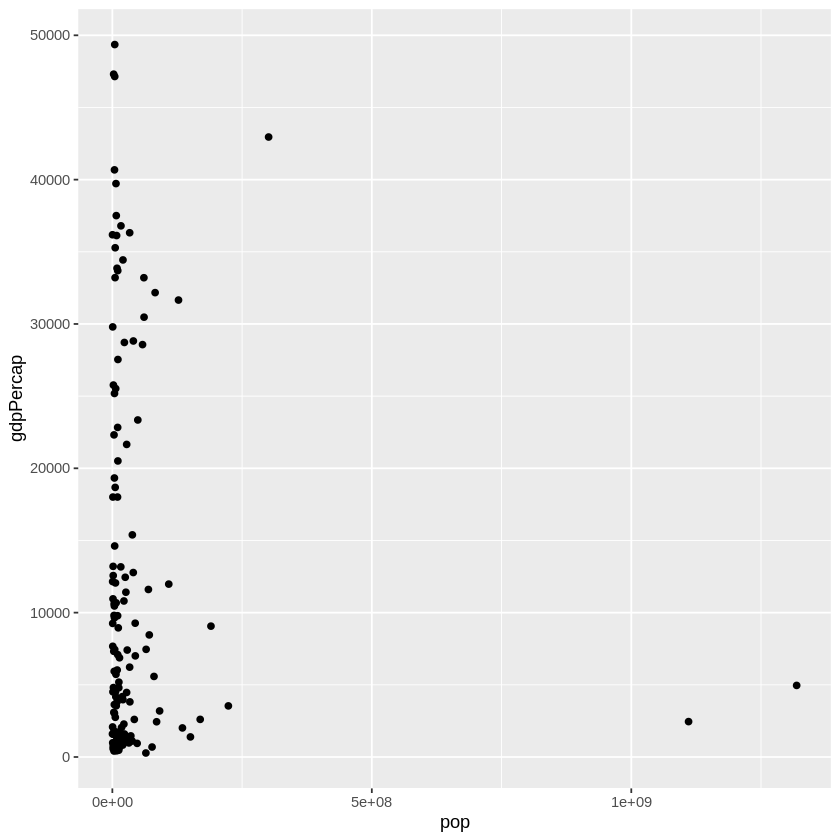

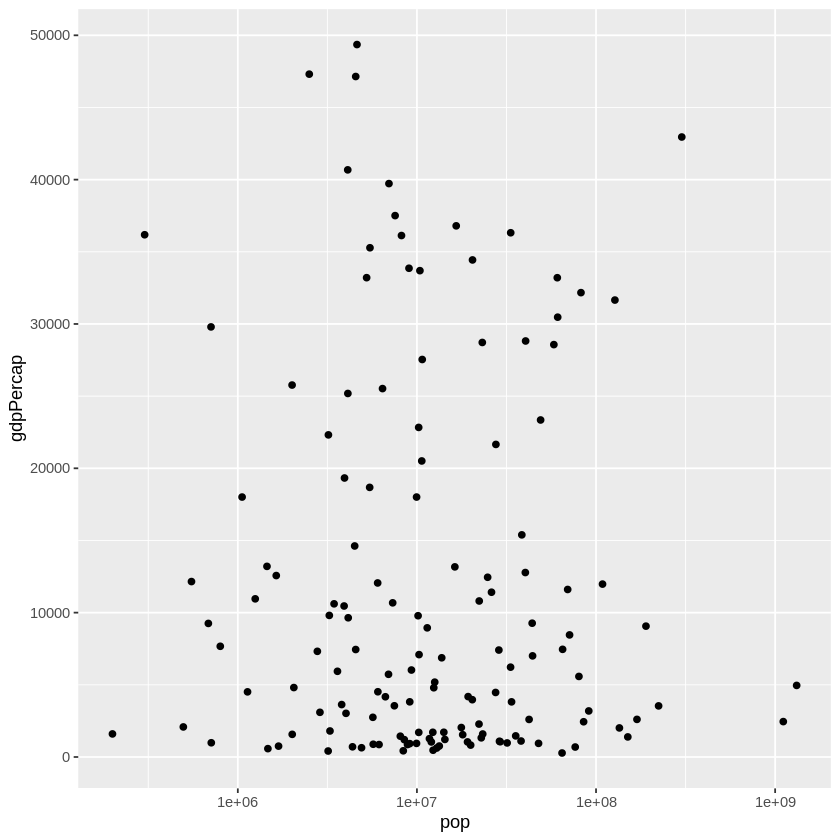

In [6]:
ggplot(gapminder_2007, aes(x = pop, y = gdpPercap)) + geom_point()
ggplot(gapminder_2007, aes(x = pop, y = gdpPercap)) + geom_point() + scale_x_log10()

### Dodatna estetika `color`
U slijedećem primjeru koristit ćemo argument `color` da bi obojali točkice na grafikonu.  
To ćemo učiniti tako da ćemo ga dodati unutar argumenta `aes` kao u zadatku.<br><br>
**Zadatak:**  
U prethodnom primjeru obojite točkice prema kontinentu.

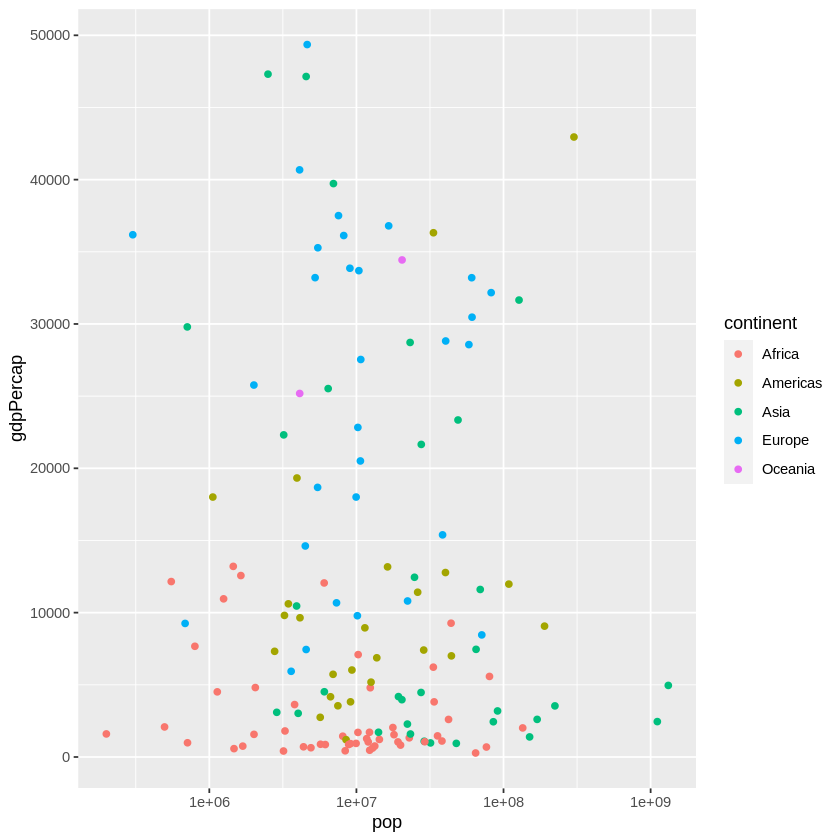

In [7]:
ggplot(gapminder_2007, aes(x = pop, y = gdpPercap, color=continent)) + geom_point() + scale_x_log10() 

Jako zgodno zar ne. Primjećujete da smo automatski i dobili legendu s desne strane.

### Dodatna estetika `size`
Točkice znaju biti dosadne. No možemo im mijenjati veličinu ovisno o zadanoj vrijednosti.  
Na taj način možemo dobiti više informacija na istom grafikonu.  
To ćemo učiniti tako da ćemo dodati argument `size` unutar argumenta `aes` kao što je to napravljeno u zadatku.<br><br>
**Zadatak:**  
U prethodnom primjeru promijenite veličinu točkica prema prosječnom životnom vijeku (sada to više neće biti točkice nego kružići).

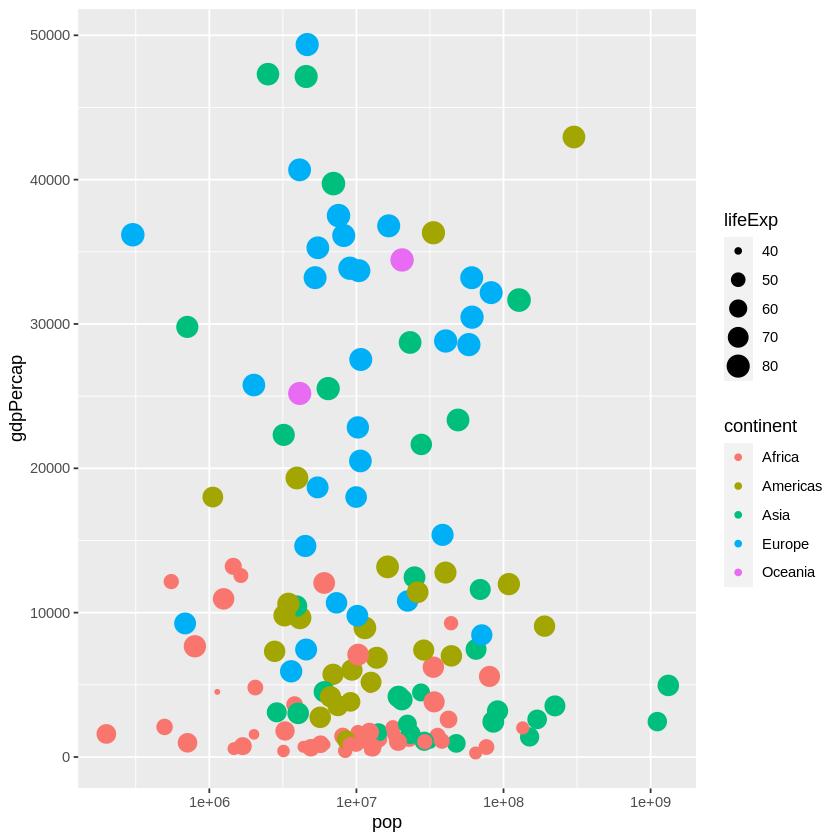

In [8]:
ggplot(gapminder_2007, aes(x = pop, y = gdpPercap, color=continent, size=lifeExp)) + geom_point() + scale_x_log10() 

## Facet (aspekt, stajalište)
Ponekad ćemo trebati usporediti nekoliko grafikona da bi došli do određenog zaključka ili da bi uočili neku povezanost.  
U tu svrhu koristiti ćemo 'faceting'.  
Na primjer, grafikon iz predhodnih zadataka možemo podijeliti u nekoliko 'podgrafova' tako da svaki prikazuje jedan kontinent.  
To čemo učiniti dodavanjem argumenta `facet_wrap(~continent)`.

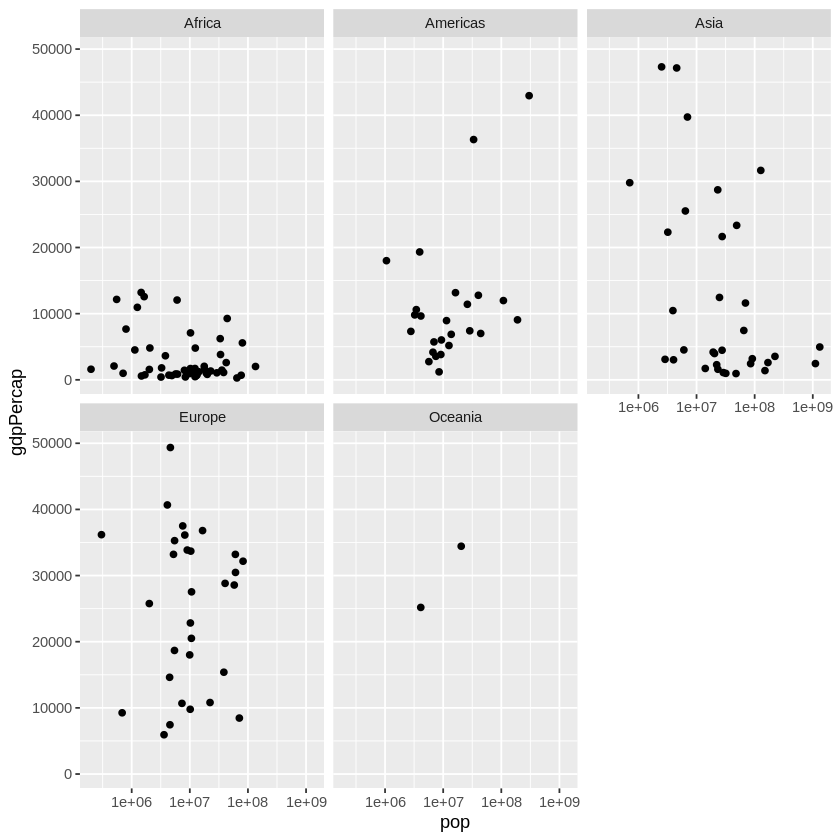

In [9]:
ggplot(gapminder_2007, aes(x = pop, y = gdpPercap)) + geom_point() + scale_x_log10() + facet_wrap(~continent)

## Zadatak
Kreirajte varijablu `gapminder_europe` (sve europske zemlje) i prikažite ju raspršenim grafikonom na način da na osi stavite GDP po glavi stanovnika i očekivani životni vijek koristeći faceting po godini.

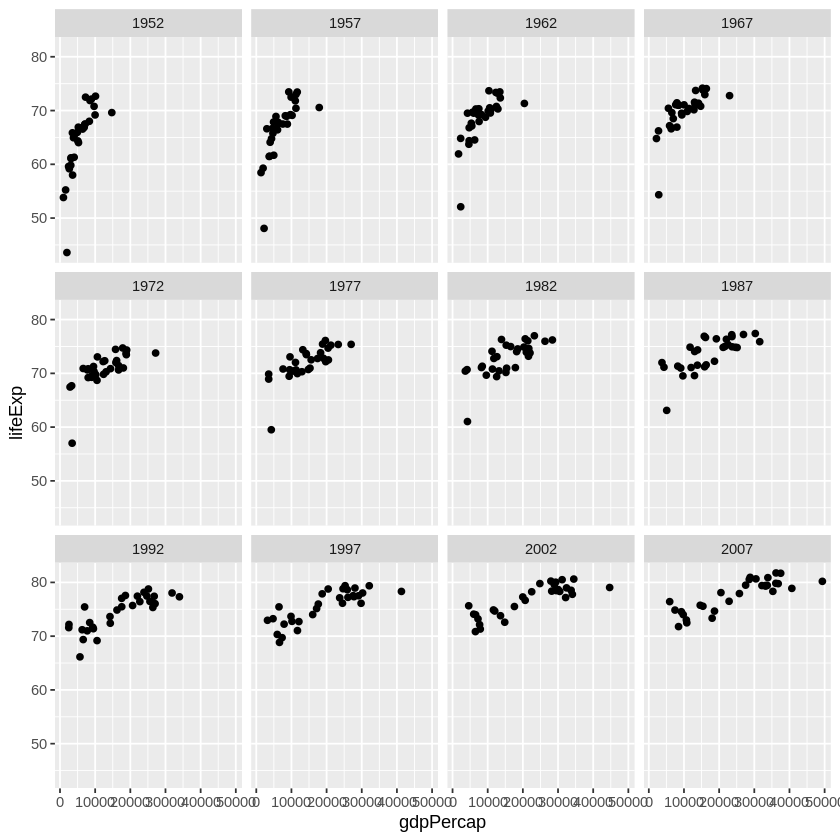

In [10]:
gapminder_europe <- gapminder %>% filter(continent=='Europe')
ggplot(gapminder_europe, aes(x = gdpPercap, y = lifeExp)) + geom_point()+facet_wrap(~year)

## Linijski grafikoni `geom_line()`

Kreirajte varijablu `gapminder_hrvatska` gdje ćete filtrirati samo vrijednosti 'Croatia' u varijabli `country`.  
Linijski grafikon koji prikazuje hrvatski BDP po glavi stanovnika kroz godine dobiti ćemo tako da ćemo koristiti argument `geom_line()` umjesto `geom_point()`.

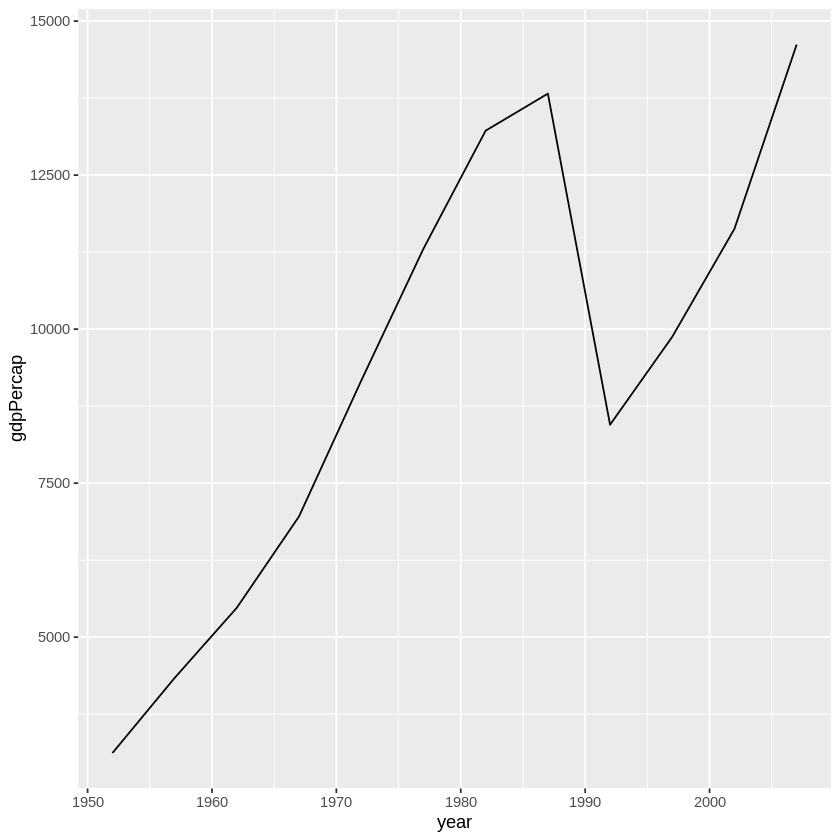

In [11]:
gapminder_hrvatska <- gapminder %>% filter(country=='Croatia')
ggplot(gapminder_hrvatska, aes(x=year,y=gdpPercap)) + geom_line()

*Primjećujete* nagli pad BDPa početkom devedesetih?

## Trakasti grafikoni (bar plots) `geom_col()`
Dataset `gapminder_hrvatska` želimo prikazati trakastim grafikonom tako da prikazuje prosječni životni vijek kroz godine.  
Dobiti ćemo ga tako da koristimo argument `geom_col()` kao argument na kraju. Trake ćemo obojiti argumentom `fill`.

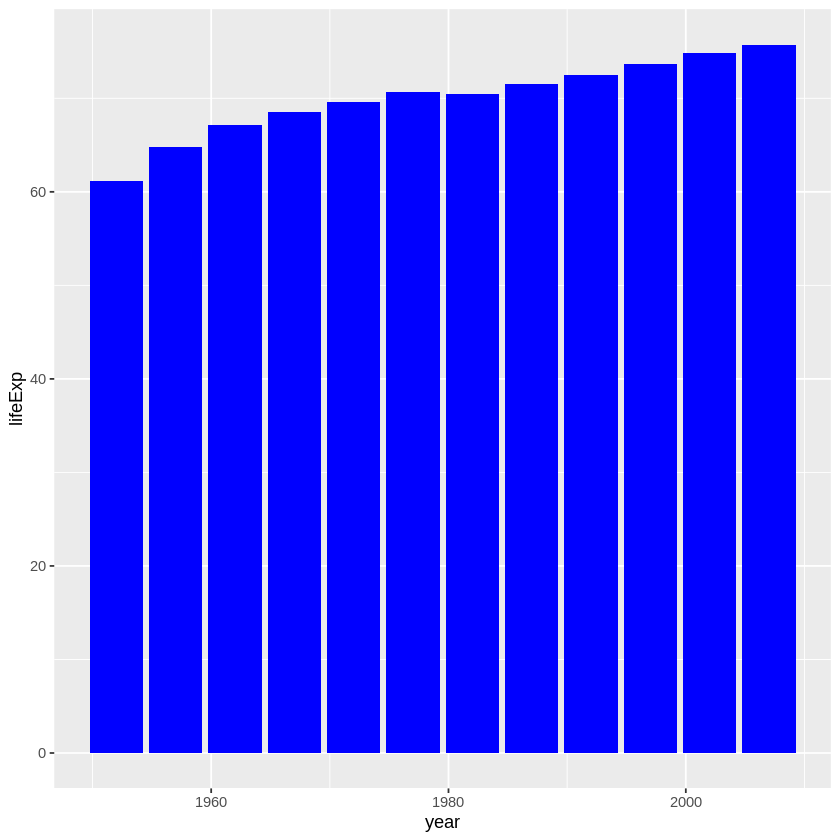

In [12]:
ggplot(gapminder_hrvatska, aes(x=year,y=lifeExp)) + geom_col(fill='blue')

## Histogrami `geom_histogram()`
Histogrami su vizualno slični trakastim grafikonima ali se suštinski jako razlikuju.  
Histogrami pružaju vizualnu interpretaciju numeričkih podataka indicirajući broj podataka koji se nalaze unutar raspona vrijednosti koji se još naziva i klasa. Histogram prikazuje učestalost podataka koji spada u određenu klasu. Ukratko histogram prikazuje broj pojavljivanja (učestalost) određene vrijednosti.  
Histogram stoga ima samo jednu os.<br><br>
**Primjer:**  
Iz baze `gapminder` histogramom prikažite broj stanovnika iz 2007 godine. Koristite logaritamsku skalu radi bolje čitljivisti.<br><br>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


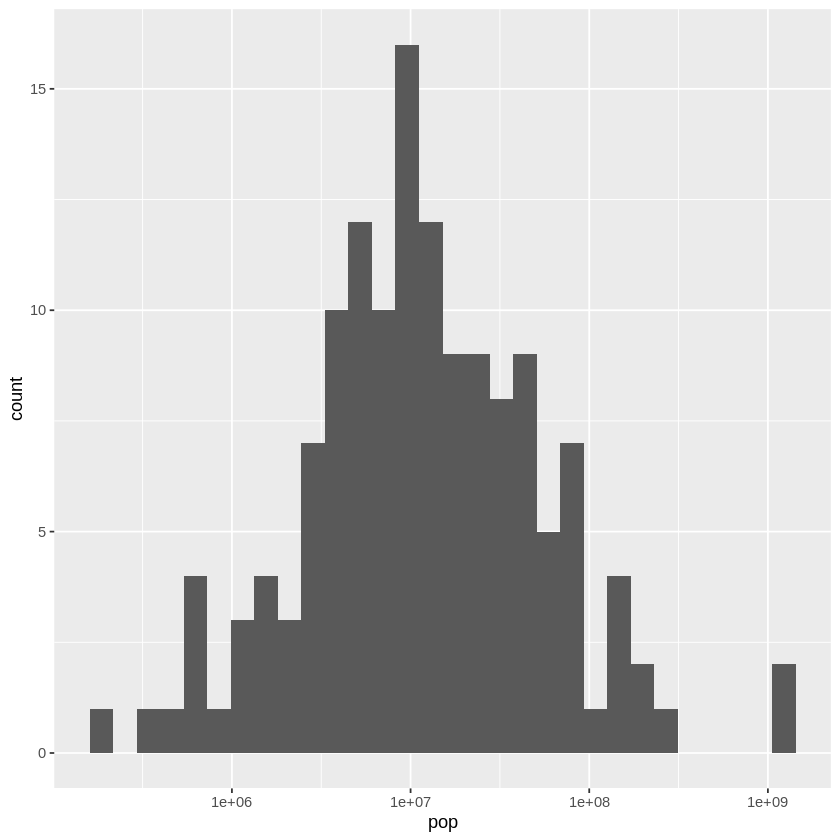

In [13]:
ggplot(gapminder_2007, aes(x=pop)) + geom_histogram()+scale_x_log10()

**Primjer 2:**  
Iz baze `mtcars` prikažite histogramom snage vozila (`hp`).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


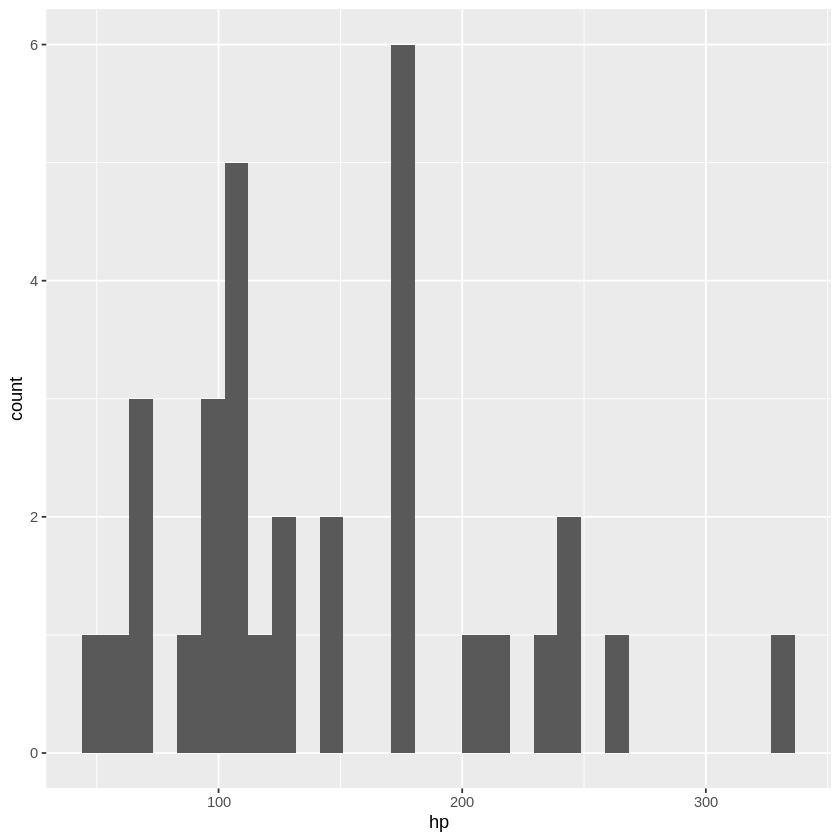

In [14]:
ggplot(mtcars, aes(x=hp)) + geom_histogram()